# RfAligner

Clase que alinea señales desplazandolas para que el pico de entrada al material en cada una de ellas coincida en un punto concreto dado como parametro.

Codigo:

In [13]:
import numpy as np
from scipy.signal import hilbert

class RfAligner:
    
    def __init__(self): #Constructor vacio
        pass
        
    #Aligns 3D signal
    
    def align(self,rfsignal,alignment_ref,min_ref = 0): # numpy.array 3D,int,int
        
        np.apply_along_axis(self.align1D,2,rfsignal,alignment_ref,min_ref) # Applies align1D to each pixel of the 3D signal
    
    #Aligns signal
    
    def align1D(self,rfsignal,alignment_ref,min_ref = 0): # numpy.array,int,int
        
        analytical = hilbert(rfsignal) #hilbert transform
        envelope = np.abs(analytical) #envelope

        array1d = rfsignal 
        align = np.zeros(array1d.shape) #zeros numpy.array with signals shape
        pad = np.argmax(array1d)  - alignment_ref #Distance to alignment reference

        if (pad > 0): #If its a positive distance

            if np.argmax(envelope)>min_ref: #If it is not more to the right than the minimum
                
                # Moving the signal to the reference
                end = len(array1d[pad:]) 
                align[:end] = array1d[pad:] 
                
                return align
            else:
                return rfsignal

        elif(pad<0): #If its a negative distance
            
            # Moving the signal to the reference
            start = len(array1d[:pad]) 
            align[np.abs(pad):] = array1d[:start] 

            return align

        else: #Already aligned

            return rfsignal
    
    #Aligns 3D signal
    
    def alignEnv(self,rfsignal,alignment_ref,min_ref = 0): # numpy.array3D,int,int
        
        np.apply_along_axis(self.align1D,2,rfsignal,alignment_ref,min_ref) # Applies align1D to each pixel of the 3D signal
    
    #Aligns signal
        
    def align1DEnv(self,rfsignal,alignment_ref,min_ref = 0): # numpy.array,int,int
        
        analytical = hilbert(rfsignal) #hilbert transform
        envelope = np.abs(analytical) #envelope

        align = np.zeros(envelope.shape) #zeros numpy.array with signals shape
        pad = np.argmax(envelope)  - alignment_ref #Distance to alignment reference

        if (pad > 0): #If its a positive distance

            if np.argmax(envelope)>min_ref: #If it is not more to the right than the minimum
                
                # Moving the signal to the reference
                end = len(envelope[pad:]) 
                align[:end] = envelope[pad:] 
                
                return align
            else:
                return rfsignal

        elif(pad<0):
            
            # Moving the signal to the reference
            start = len(envelope[:pad]) 
            align[np.abs(pad):] = envelope[:start] 

            return align

        else: #Already aligned

            return rfsignal
        
    # Max of each signal pixel
    
    def allMax(self,rfsignal): #numpy.array
        
        return np.apply_along_axis(np.argmax,2,rfsignal)
        
        
    
    

## Requisitos

Las librerias SciPY y Numpy deben estar instaladas para garantizar el correcto funcionamiento de la clase


## Funciones

La clase cuenta actualmente con dos funciones que alinean la señal, una para arrays unidimensionales y otra para arrays multidimensionales

### align1D

Esta función, como su propio nombre indica, es la de arrays unidimensionales.

Los parametros de entrada de esta función son los siguientes:

- rfsignal: Numpy array 1D que representa la señal a alinear

- alignment_ref: Indica la coordenada X en la que se alinearan la señal

- min_ref: Parametro de control que indica cuanto debe estar alejado el pico de entrada del inicio de la señal para alinearlo hacia la izquierda, para asi evitar que se pierda la información que hay antes de dicho pico, por defecto 0

Devuelve la señal alineada

## align

Esta función tiene los mismos parametros que la anterior con una diferencia, rfsignal debe ser un array tridimensional, al cual se le aplicara en cada array 1D que contiene la función de alineado para una dimensión mencionada anteriormente.

## align1Denv y alignEnv

Como las anteriores, pero calcula la envolvente de la señal y devuelve esta envolvente alineada.

## Ejemplo

A continuación veremos un ejemplo de uso y los resultados que genera sobre un array unidimensional

In [4]:
señal = np.array([0,0,0,0,2,4,6,8,10,8,6,4,2,0,0,0,0]) #Señal a alinear
referencia = 5 #Punto a alinear
alineador = RfAligner() #Instancia de la clase
alineado = alineador.align1D(señal,referencia)

(-1.0, 11.0)

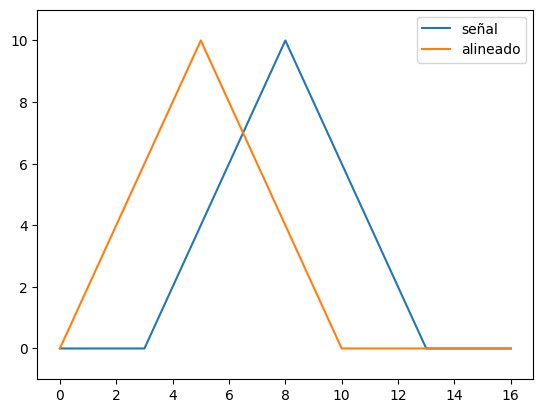

In [11]:
import matplotlib.pyplot as plt
plt.plot(señal)
plt.plot(alineado)
plt.legend(['señal','alineado'])
plt.ylim(-1,11)

Se puede apreciar como el pico de la señal que se encuentra en la coordenada x = 9, tras el alineado se encuentra en x = 5